In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 데이터 로드
data = pd.read_csv('/content/news.csv', encoding='latin1', index_col=0, quoting=1)

In [10]:
data

,title,text,label
8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
8062,The âPâ in PBS Should Stand for âPlutocr...,The âPâ in PBS Should Stand for âPlutocr...,FAKE
8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia âPresident Obama conve...",REAL


In [11]:
# 데이터의 기본 정보 확인
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6335 entries, 8476 to 4330
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 198.0+ KB
None
                                                   title  \
8476                      You Can Smell Hillaryâs Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   

                                                    text label  
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL  
10142  â Kaydee King (@KaydeeKing) November 9,

title    0
text     0
label    0
dtype: int64


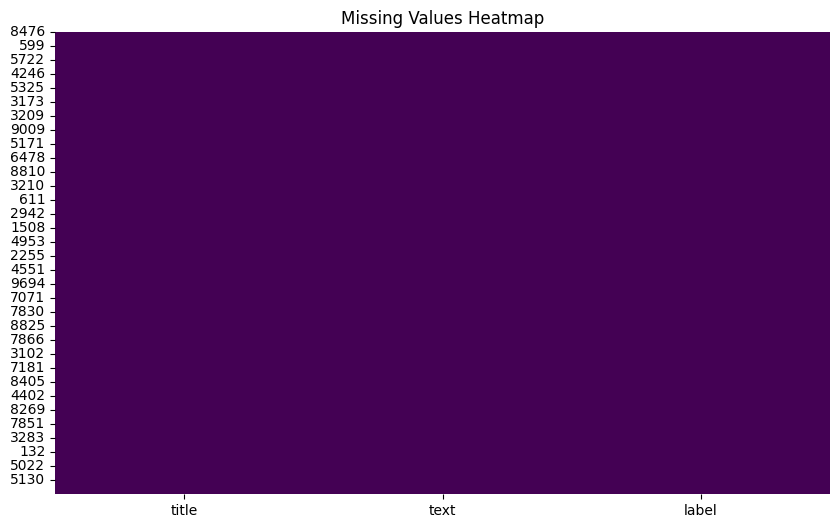

title    0
text     0
label    0
dtype: int64


In [12]:
# 결측치 확인
print(data.isnull().sum())

# 결측치 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# 결측치가 있는 행 제거
data.dropna(inplace=True)
print(data.isnull().sum())


label
REAL    3171
FAKE    3164
Name: count, dtype: int64


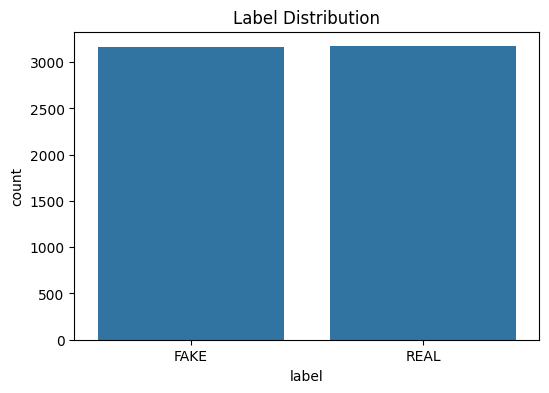

In [13]:
# 데이터 분포 확인
print(data['label'].value_counts())

# 데이터 분포 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.title("Label Distribution")
plt.show()


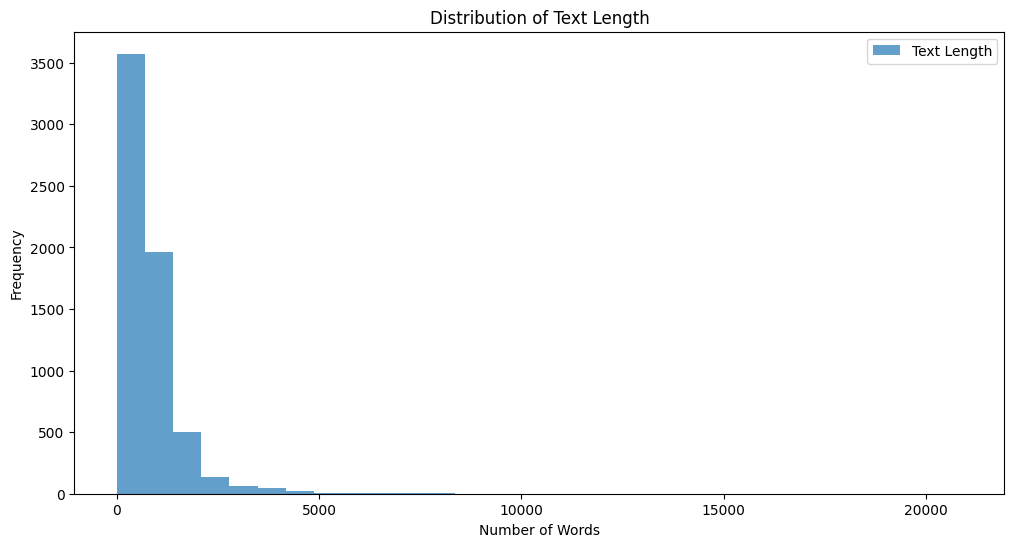

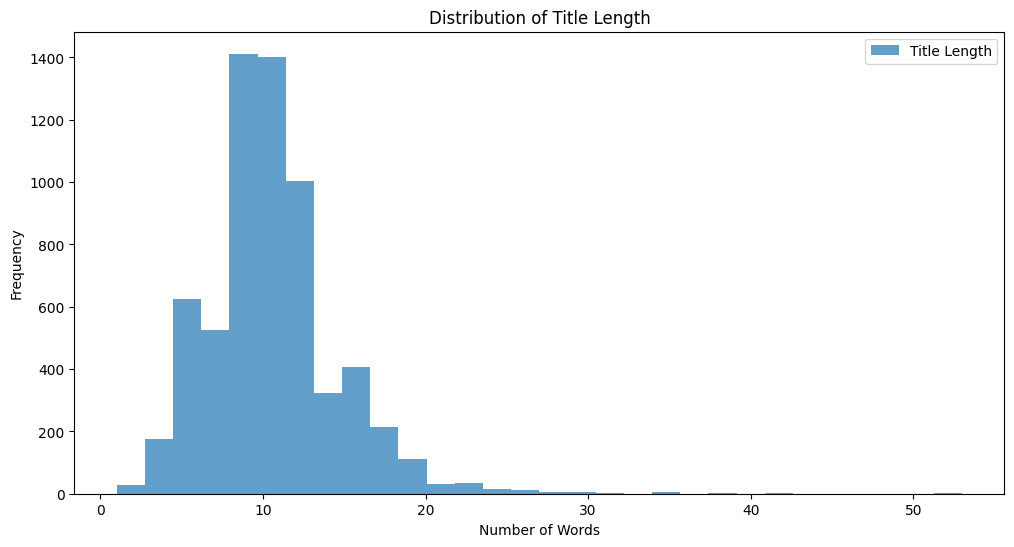

In [15]:
# 텍스트 길이 분포
data['title_length'] = data['title'].apply(lambda x: len(x.split()))
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
plt.hist(data['text_length'], bins=30, alpha=0.7, label='Text Length')
plt.title("Distribution of Text Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(data['title_length'], bins=30, alpha=0.7, label='Title Length')
plt.title("Distribution of Title Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.show()


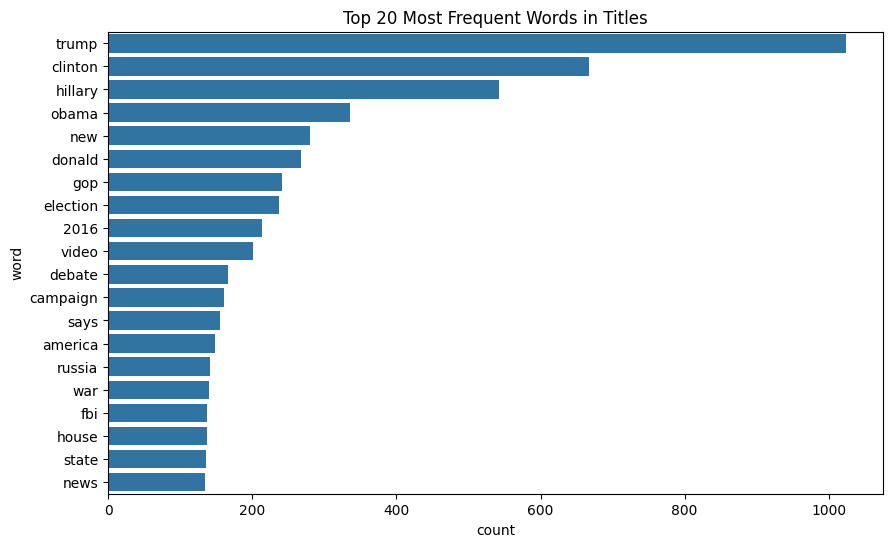

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# 제목에서 가장 많이 등장하는 단어 확인
vectorizer = CountVectorizer(stop_words='english', max_features=20)
title_words = vectorizer.fit_transform(data['title'])
title_word_count = np.sum(title_words.toarray(), axis=0)

# 데이터프레임 생성
title_word_df = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': title_word_count
}).sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=title_word_df)
plt.title("Top 20 Most Frequent Words in Titles")
plt.show()


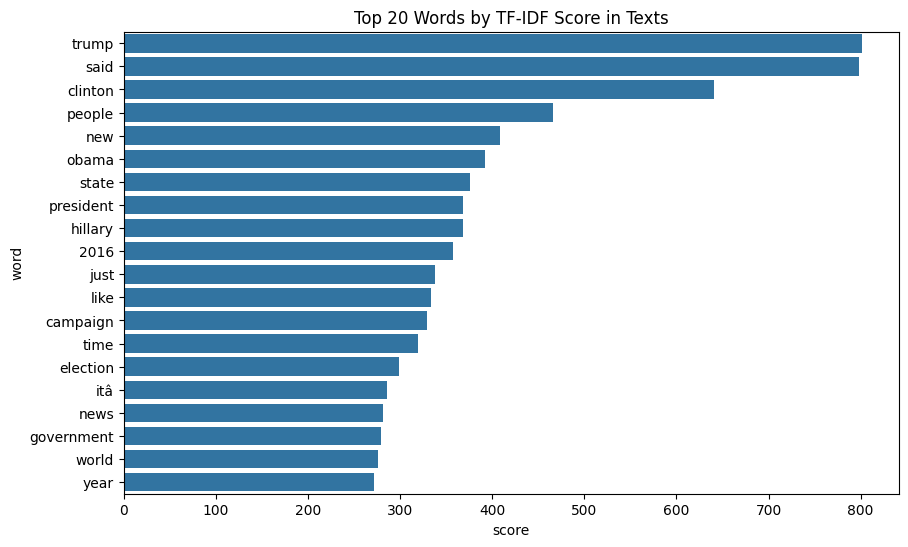

In [17]:
# TfidfVectorizer 사용하여 문서-단어 행렬 생성
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# TF-IDF 점수 시각화
tfidf_scores = np.sum(tfidf_matrix.toarray(), axis=0)
tfidf_df = pd.DataFrame({
    'word': tfidf_feature_names,
    'score': tfidf_scores
}).sort_values(by='score', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='word', data=tfidf_df)
plt.title("Top 20 Words by TF-IDF Score in Texts")
plt.show()


In [18]:
import pandas as pd

# 웹 페이지에서 CSV 데이터를 읽을 때 첫 번째 열을 인덱스로 설정
url = "https://zenodo.org/records/4561253/files/WELFake_Dataset.csv"
data = pd.read_csv(url, sep=",", index_col=0, quoting=1)

In [19]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB
None
                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                NaN   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sa

title    558
text      39
label      0
dtype: int64


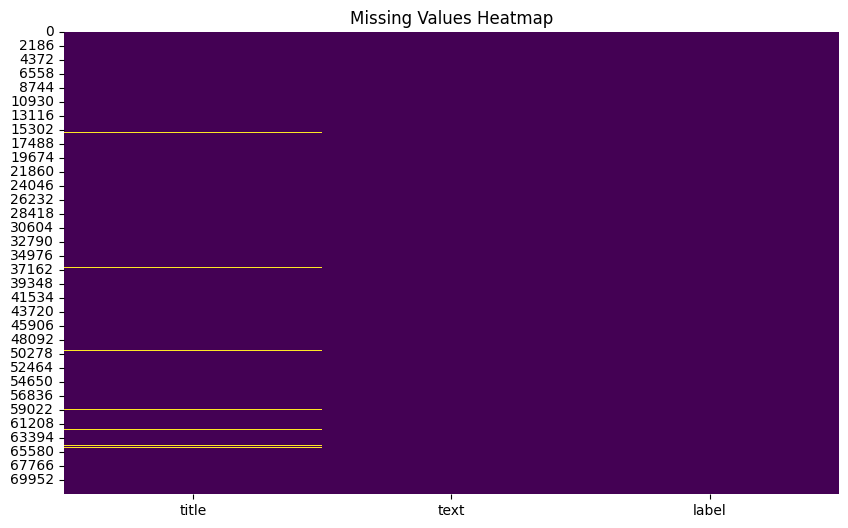

In [20]:
# 결측치 확인
print(data.isnull().sum())

# 결측치 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [21]:
# 결측치가 있는 행 제거
data.dropna(inplace=True)
print(data.isnull().sum())

title    0
text     0
label    0
dtype: int64


label
1    36509
0    35028
Name: count, dtype: int64


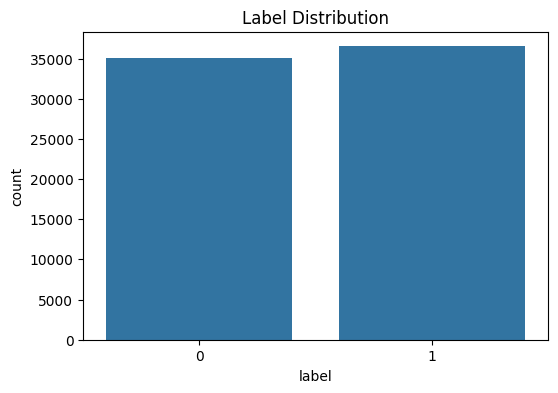

In [22]:
# 데이터 분포 확인
print(data['label'].value_counts())

# 데이터 분포 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.title("Label Distribution")
plt.show()


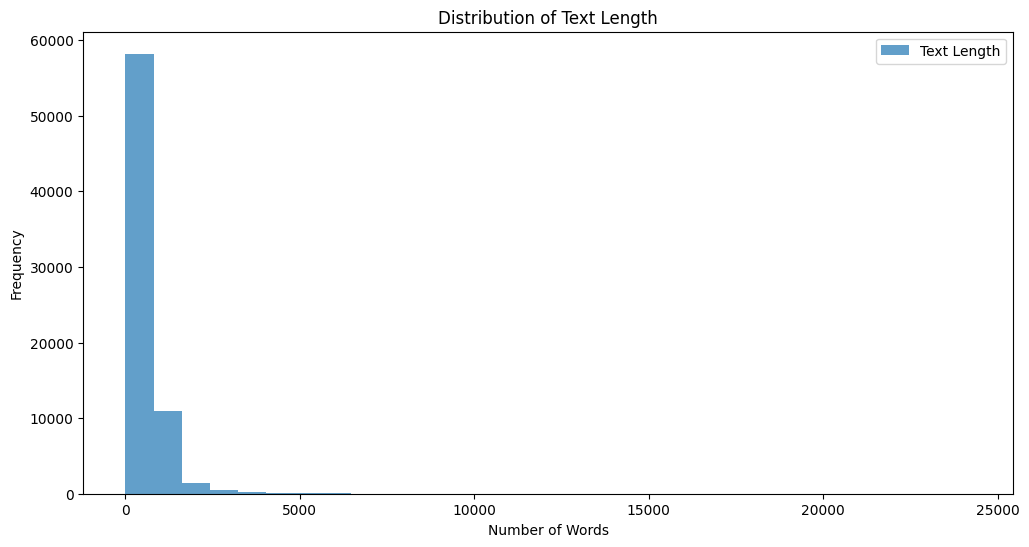

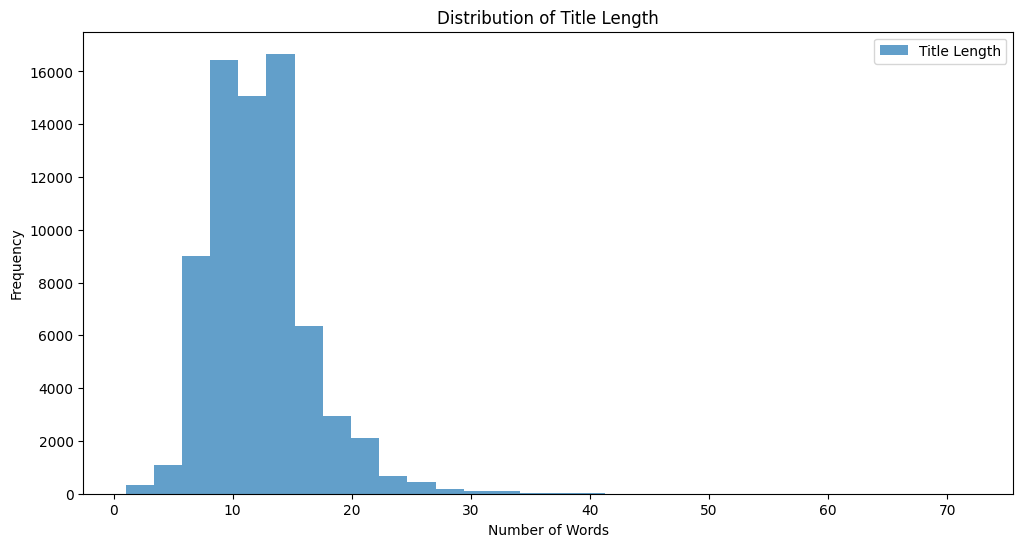

In [23]:
# 텍스트 길이 분포
data['title_length'] = data['title'].apply(lambda x: len(x.split()))
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
plt.hist(data['text_length'], bins=30, alpha=0.7, label='Text Length')
plt.title("Distribution of Text Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(data['title_length'], bins=30, alpha=0.7, label='Title Length')
plt.title("Distribution of Title Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.show()


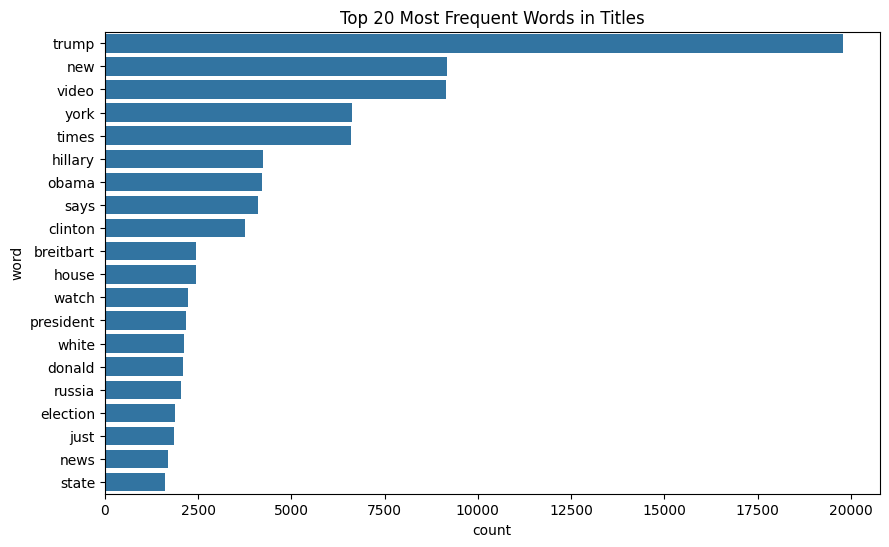

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# 제목에서 가장 많이 등장하는 단어 확인
vectorizer = CountVectorizer(stop_words='english', max_features=20)
title_words = vectorizer.fit_transform(data['title'].dropna())
title_word_count = np.sum(title_words.toarray(), axis=0)

# 데이터프레임 생성
title_word_df = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': title_word_count
}).sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=title_word_df)
plt.title("Top 20 Most Frequent Words in Titles")
plt.show()


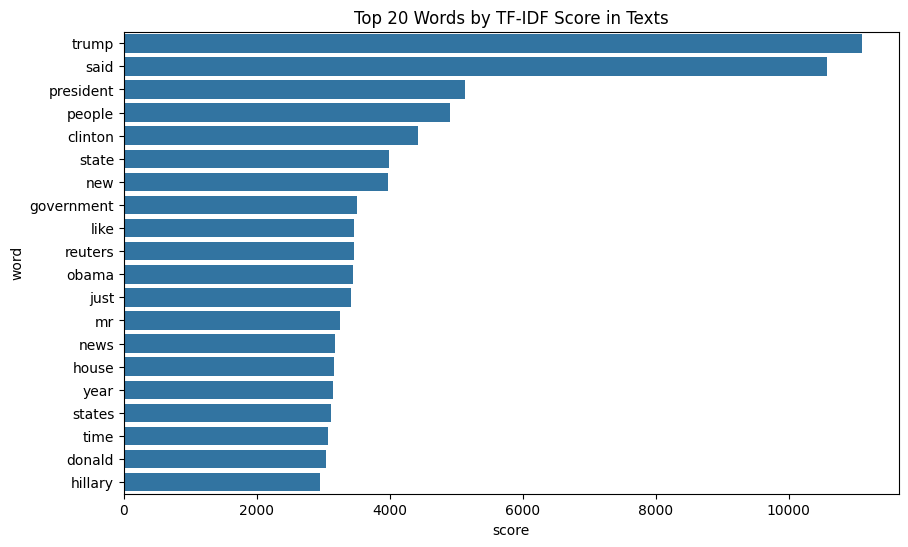

In [25]:
# TfidfVectorizer 사용하여 문서-단어 행렬 생성
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'].dropna())
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# TF-IDF 점수 시각화
tfidf_scores = np.sum(tfidf_matrix.toarray(), axis=0)
tfidf_df = pd.DataFrame({
    'word': tfidf_feature_names,
    'score': tfidf_scores
}).sort_values(by='score', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='word', data=tfidf_df)
plt.title("Top 20 Words by TF-IDF Score in Texts")
plt.show()


In [2]:
fake = pd.read_csv('/content/Fake.csv')
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
true = pd.read_csv('/content/True.csv')
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
fake['label'] = 'FAKE'
true['label'] = 'TRUE'

In [5]:
data = []
data = pd.concat([fake, true], ignore_index=True)

In [6]:
data

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",TRUE
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",TRUE
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",TRUE
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",TRUE


In [7]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB
None
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    New

title      0
text       0
subject    0
date       0
label      0
dtype: int64


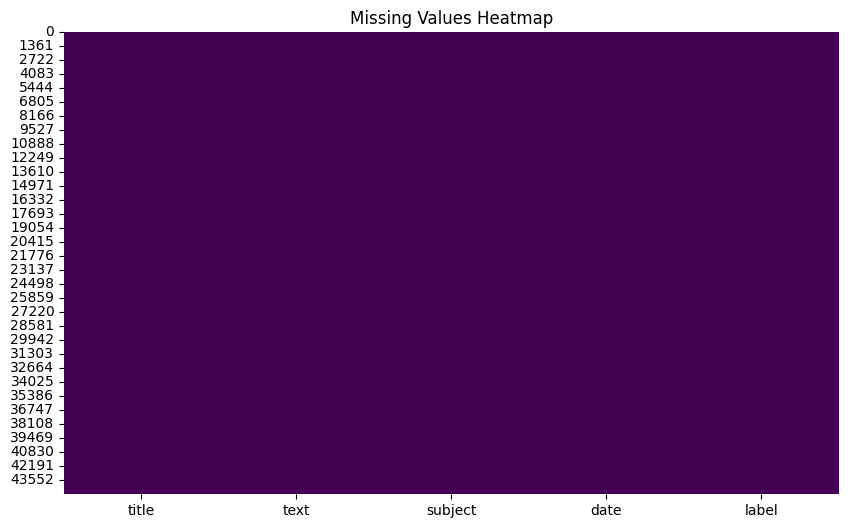

In [8]:
# 결측치 확인
print(data.isnull().sum())

# 결측치 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

label
FAKE    23481
TRUE    21417
Name: count, dtype: int64


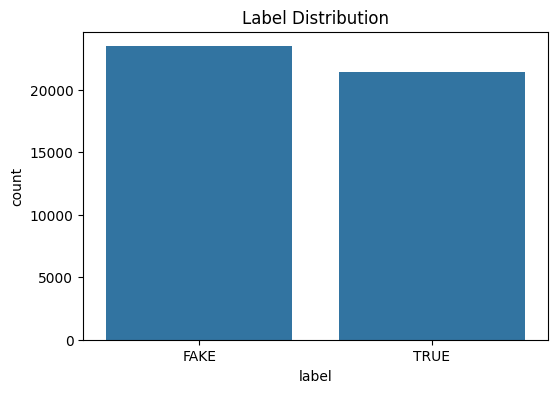

In [9]:
# 데이터 분포 확인
print(data['label'].value_counts())

# 데이터 분포 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.title("Label Distribution")
plt.show()


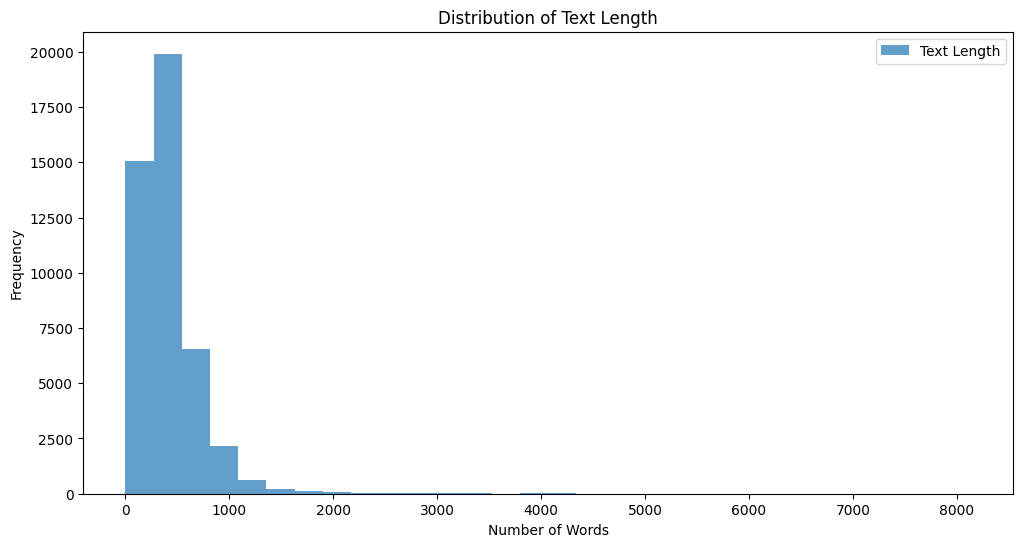

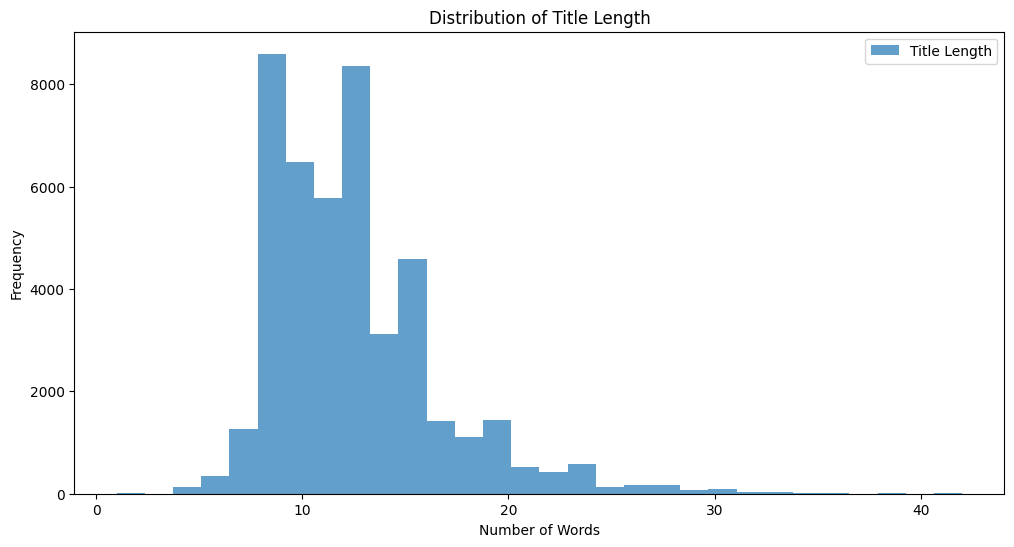

In [15]:
# 텍스트 길이 분포
data['title_length'] = data['title'].apply(lambda x: len(x.split()))
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
plt.hist(data['text_length'], bins=30, alpha=0.7, label='Text Length')
plt.title("Distribution of Text Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(data['title_length'], bins=30, alpha=0.7, label='Title Length')
plt.title("Distribution of Title Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.show()

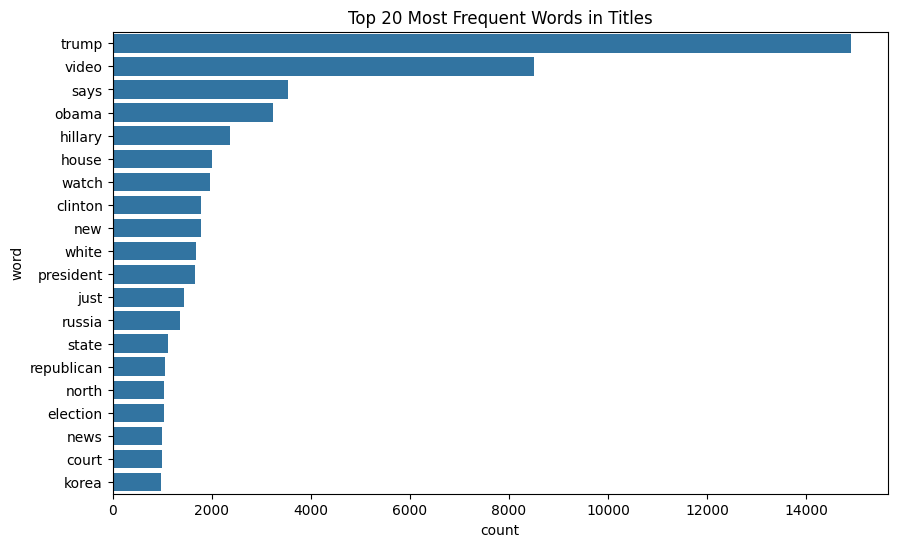

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# 제목에서 가장 많이 등장하는 단어 확인
vectorizer = CountVectorizer(stop_words='english', max_features=20)
title_words = vectorizer.fit_transform(data['title'].dropna())
title_word_count = np.sum(title_words.toarray(), axis=0)

# 데이터프레임 생성
title_word_df = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': title_word_count
}).sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=title_word_df)
plt.title("Top 20 Most Frequent Words in Titles")
plt.show()


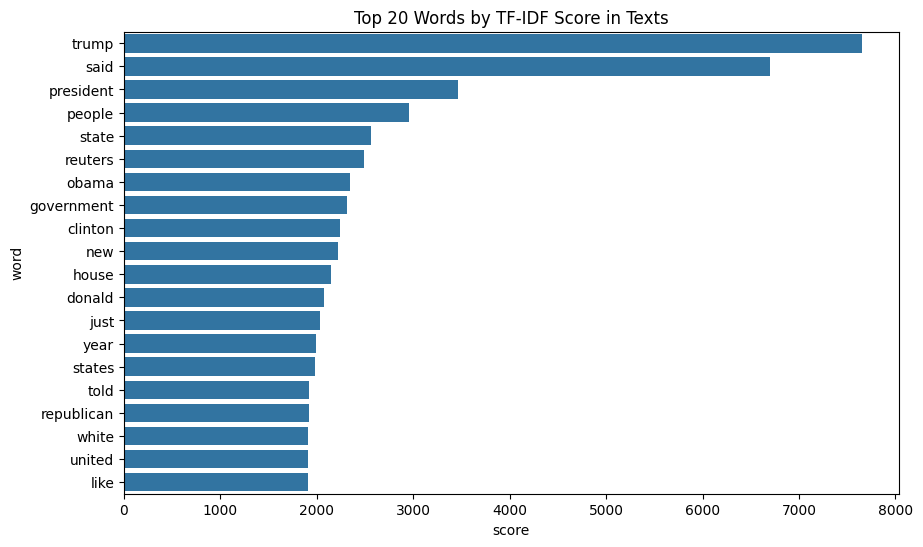

In [17]:
# TfidfVectorizer 사용하여 문서-단어 행렬 생성
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'].dropna())
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# TF-IDF 점수 시각화
tfidf_scores = np.sum(tfidf_matrix.toarray(), axis=0)
tfidf_df = pd.DataFrame({
    'word': tfidf_feature_names,
    'score': tfidf_scores
}).sort_values(by='score', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='word', data=tfidf_df)
plt.title("Top 20 Words by TF-IDF Score in Texts")
plt.show()
